In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-06-11_174415_sweep_stream.nc')

In [4]:
ss = [ncf.read(name) for name in ncf.node_names()]

In [5]:
[s.sweep.resonator.Q_i for s in ss]

[2109.0418287393795, 32480.63961645032, 11621.831892832144, 4223.5210391974624]

In [6]:
[s.sweep.resonator.Q_e_real for s in ss]

[1851.406367067342, 104042.31270253882, 17992.496313635631, 1646.2193242192409]

In [7]:
[s.sweep.resonator.Q_e_imag for s in ss]

[1028.0838360544294,
 31536.131777476519,
 8339.0165742896497,
 -1862.4367943834513]

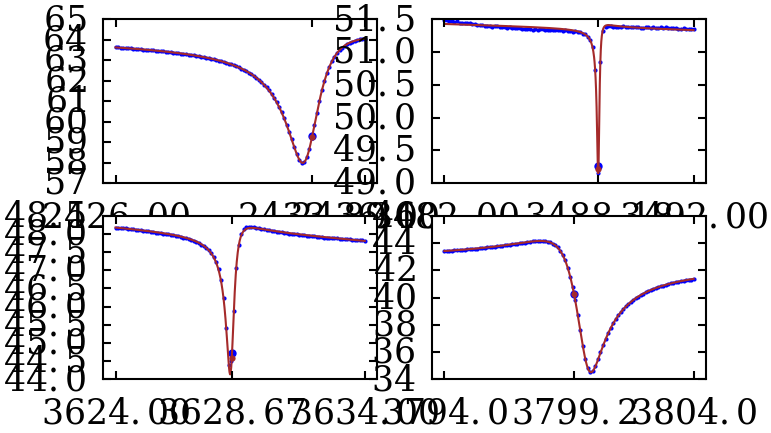

In [8]:
fig, axes = plt.subplots(2, 2)

plt.rcParams['figure.subplot.hspace'] = 0.3
plt.rcParams['figure.subplot.wspace'] = 0.3

for s, ax in zip(ss, axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2)
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)

    f_span = f_max - f_min
    ax.set_xlim(f_scale * (f_min - 0.05 * f_span), f_scale * (f_max + 0.05 * f_span))
    ax.set_xticks(f_scale * np.array([f_min, f_r, f_max]))

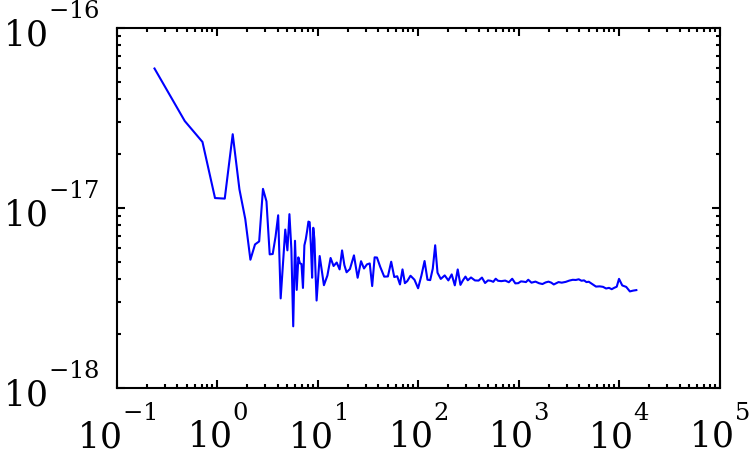

In [17]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

for s in ss[1:2]:
    s.set_q_and_x(deglitch=True)
    ax.plot(s.S_frequency, s.S_xx)

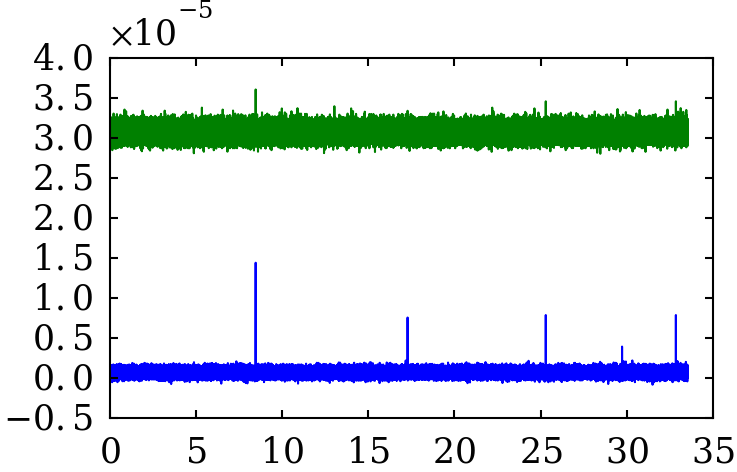

In [10]:
s = ss[1]
s.set_q_and_x(deglitch=False)

fig, ax = plt.subplots()
ax.plot(s.stream.sample_time, s.x)
ax.plot(s.stream.sample_time, s.q)

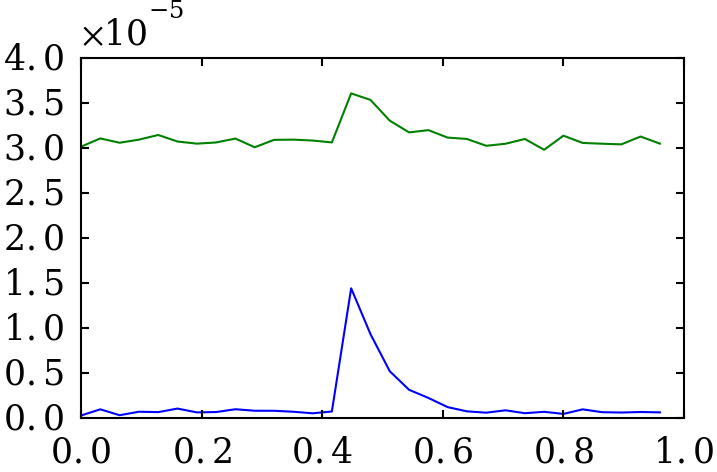

In [15]:
s1g = s.epochs(s.stream.epoch + 8.466, s.stream.epoch + 8.467)
s1g.set_q_and_x(deglitch=False)
fig, ax = plt.subplots()
ax.plot(1e3 * s1g.stream.sample_time, s1g.x)
ax.plot(1e3 * s1g.stream.sample_time, s1g.q)